In [44]:
# Notebook to study the gammas emmited from the 2nubb events
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic color scale
from matplotlib.cm import get_cmap

# Create a sequential colormap
cmap = get_cmap('Spectral')  # You can choose any sequential colormap here

# plt.rcParams["font.size"] = 15
# plt.rcParams["figure.figsize"] = 11,9

In [45]:
# Loading in the file
files = []
files.append("../data/nexus/LPR_Tl208_Ports/NEXT100_eminus_slim.h5") # 10k generated events in the center
# files.append("../data/nexus/LPR_Tl208_Ports/NEXT100_LPR_Tl208_PORT1a_slim.h5") # LPR Port 1A event
print(files)

config_v = []
parts_v  = []
hits_v   = []


for index, f in enumerate(files):
    config_v.append(pd.read_hdf(f, 'config'))
    parts_v .append(pd.read_hdf(f, 'parts'))
    hits_v  .append(pd.read_hdf(f, 'hits'))
    
display(config_v[0])


['../data/nexus/LPR_Tl208_Ports/NEXT100_LPR_Tl208_PORT1a_slim.h5']


param_key  \
0                               event_type   
1                               num_events   
2                             saved_events   
3                       interacting_events   
4             /PhysicsList/RegisterPhysics   
5             /PhysicsList/RegisterPhysics   
6             /PhysicsList/RegisterPhysics   
7             /PhysicsList/RegisterPhysics   
8                  /nexus/RegisterGeometry   
9                 /nexus/RegisterGenerator   
10                /nexus/RegisterRunAction   
11              /nexus/RegisterEventAction   
12           /nexus/RegisterTrackingAction   
13       /nexus/RegisterPersistencyManager   
14                    /nexus/RegisterMacro   
15                        /control/verbose   
16                            /run/verbose   
17                          /event/verbose   
18                       /tracking/verbose   
19   /Generator/IonGenerator/atomic_number   
20     /Generator/IonGenerator/mass_number   
21          /Generator/IonGenerator/region   
22  /Actions/DefaultEventAction/min_energy   
23         /Geometry/Next100/max_step_size   
24              /Geometry/Next100/pressure   
25               /Geometry/Next100/elfield   
26                   /Geometry/Next100/gas   
27                      /nexus/random_seed   
28             /nexus/persistency/start_id   
29           /nexus/persistency/outputFile   

                                          param_value  
0                                               other  
1                                               10000  
2                                                 342  
3                                                2035  
4                         G4EmStandardPhysics_option4  
5                                      G4DecayPhysics  
6                           G4RadioactiveDecayPhysics  
7                                G4StepLimiterPhysics  
8                                             Next100  
9                                        IonGenerator  
10                                   DefaultRunAction  
11                                 DefaultEventAction  
12                              DefaultTrackingAction  
13                                 PersistencyManager  
14  /mnt/lustre/scratch/nvme/SLURM/4517749/100/POR...  
15                                                  1  
16                                                  1  
17                                                  0  
18                                                  0  
19                                                 81  
20                                                208  
21                                            PORT_1a  
22                                          0.400 MeV  
23                                             1.  mm  
24                                              5 bar  
25                                              false  
26                                         depletedXe  
27                                                100  
28                                             990000  
29  /mnt/lustre/scratch/nvme/SLURM/4517749/100/POR...

In [3]:
## Particles
# print(parts_v[0].particle_name.unique())
# display(parts_v[0][ (parts_v[0]["particle_name"] == "gamma") & (parts_v[0]["final_volume"] == "ACTIVE")   ])
# display(parts_v[0].head(4))

display(parts_v[0])
print(parts_v[0].final_volume.unique())

print(len(parts_v[0].event_id.unique()))

# Lets get rid of events that have an energy deposition not active
evids =  parts_v[0][  (parts_v[0].final_volume != "ACTIVE")     ].event_id.unique()
print(len(evids)) 

filtered_parts = parts_v[0][~parts_v[0]['event_id'].isin(evids)]
display(filtered_parts)

filtered_parts_v = []
filtered_parts_v.append(filtered_parts)


event_id  particle_id particle_name  primary  mother_id  initial_x  \
0             99            1            e-        1          0   0.000000   
1             99           15            e-        0          1 -15.092288   
2             99           14         gamma        0          1 -12.731240   
3             99           21            e-        0         14 -16.675760   
4             99           20            e-        0         14 -16.675760   
...          ...          ...           ...      ...        ...        ...   
458862     10098           30            e-        0         16  76.217453   
458863     10098           29            e-        0         16  76.217453   
458864     10098           28            e-        0         16  76.217453   
458865     10098           15            e-        0          3  85.421791   
458866     10098            2            e-        0          1   7.435348   

         initial_y   initial_z  initial_t    final_x     final_y     final_z  \
0         0.000000  593.700012   0.000000 -16.464205 -306.544220  863.235962   
1      -305.717285  862.660278   2.136695 -15.091941 -305.252136  863.769653   
2      -307.266357  862.686707   2.121908 -16.675760 -308.190308  863.445801   
3      -308.190308  863.445801   2.135657 -16.675682 -308.190338  863.445618   
4      -308.190308  863.445801   2.135657 -16.675716 -308.190094  863.445862   
...            ...         ...        ...        ...         ...         ...   
458862 -111.234299  334.691528   1.131275  76.217552 -111.234123  334.691437   
458863 -111.234299  334.691528   1.131275  76.218483 -111.230255  334.699036   
458864 -111.234299  334.691528   1.131275  76.169777 -111.001877  334.695221   
458865  -94.458260  379.249237   0.969521  74.087357 -103.546783  364.301849   
458866   18.071953  577.915161   0.087173   7.544531   18.403408  577.748474   

         final_t final_volume  kin_energy      length creator_proc final_proc  
0       2.301758       ACTIVE    2.600000  637.729248         none      eIoni  
1       2.155849       ACTIVE    0.046857    2.590357        eIoni      eIoni  
2       2.135657       ACTIVE    0.016992    4.121797        eBrem       phot  
3       2.135734       ACTIVE    0.000021    0.000360         phot      eIoni  
4       2.135714       ACTIVE    0.000044    0.000320         phot        msc  
...          ...          ...         ...         ...          ...        ...  
458862  1.131292       ACTIVE    0.000551    0.000233         phot        msc  
458863  1.131578       ACTIVE    0.003735    0.032794         phot      eIoni  
458864  1.138128       ACTIVE    0.024674    0.917886         phot      eIoni  
458865  1.328054       ACTIVE    0.354875   74.698883         phot      eIoni  
458866  0.100688       ACTIVE    0.042463    1.832906        eIoni      eIoni  

[458867 rows x 18 columns]

['ACTIVE' 'ICS' 'FIELD_RING' 'LIGHT_TUBE_DRIFT' 'EP_COPPER_PLATE'
 'TP_COPPER_PLATE' 'SIPM_BOARD_MASK' 'HDPE_TUBE' 'STAVE' 'EL_GAP' 'BUFFER'
 'SAPPHIRE_WINDOW' 'VESSEL_GAS' 'GATE_RING' 'PMT' 'PMT_WINDOW'
 'CATHODE_RING' 'LIGHT_TUBE_BUFFER' 'VESSEL' 'LEAD_BOX' 'ANODE_RING'
 'STEEL_BOX' 'SIPM_S13372' 'DRIFT_TPB']
10000
3109


event_id  particle_id particle_name  primary  mother_id  initial_x  \
0             99            1            e-        1          0   0.000000   
1             99           15            e-        0          1 -15.092288   
2             99           14         gamma        0          1 -12.731240   
3             99           21            e-        0         14 -16.675760   
4             99           20            e-        0         14 -16.675760   
...          ...          ...           ...      ...        ...        ...   
458862     10098           30            e-        0         16  76.217453   
458863     10098           29            e-        0         16  76.217453   
458864     10098           28            e-        0         16  76.217453   
458865     10098           15            e-        0          3  85.421791   
458866     10098            2            e-        0          1   7.435348   

         initial_y   initial_z  initial_t    final_x     final_y     final_z  \
0         0.000000  593.700012   0.000000 -16.464205 -306.544220  863.235962   
1      -305.717285  862.660278   2.136695 -15.091941 -305.252136  863.769653   
2      -307.266357  862.686707   2.121908 -16.675760 -308.190308  863.445801   
3      -308.190308  863.445801   2.135657 -16.675682 -308.190338  863.445618   
4      -308.190308  863.445801   2.135657 -16.675716 -308.190094  863.445862   
...            ...         ...        ...        ...         ...         ...   
458862 -111.234299  334.691528   1.131275  76.217552 -111.234123  334.691437   
458863 -111.234299  334.691528   1.131275  76.218483 -111.230255  334.699036   
458864 -111.234299  334.691528   1.131275  76.169777 -111.001877  334.695221   
458865  -94.458260  379.249237   0.969521  74.087357 -103.546783  364.301849   
458866   18.071953  577.915161   0.087173   7.544531   18.403408  577.748474   

         final_t final_volume  kin_energy      length creator_proc final_proc  
0       2.301758       ACTIVE    2.600000  637.729248         none      eIoni  
1       2.155849       ACTIVE    0.046857    2.590357        eIoni      eIoni  
2       2.135657       ACTIVE    0.016992    4.121797        eBrem       phot  
3       2.135734       ACTIVE    0.000021    0.000360         phot      eIoni  
4       2.135714       ACTIVE    0.000044    0.000320         phot        msc  
...          ...          ...         ...         ...          ...        ...  
458862  1.131292       ACTIVE    0.000551    0.000233         phot        msc  
458863  1.131578       ACTIVE    0.003735    0.032794         phot      eIoni  
458864  1.138128       ACTIVE    0.024674    0.917886         phot      eIoni  
458865  1.328054       ACTIVE    0.354875   74.698883         phot      eIoni  
458866  0.100688       ACTIVE    0.042463    1.832906        eIoni      eIoni  

[295070 rows x 18 columns]

In [4]:
# Plot the distance of the gammas and bin in a histogram
gammas_v = []

for df in filtered_parts_v:
    gammas_v.append(df[  (df["particle_name"] == "gamma") ])


In [28]:
display(gammas_v[0][gammas_v[0].creator_proc == "eBrem" ])
print(gammas_v[0].creator_proc.unique())

print(pd.unique(pd.concat([gammas_v[0]['creator_proc'], gammas_v[0]['final_proc']])))

event_id  particle_id particle_name  primary  mother_id   initial_x  \
2             99           14         gamma        0          1  -12.731240   
18            99           11         gamma        0          1    7.450352   
44            99            9         gamma        0          1   30.765688   
55            99            6         gamma        0          1   79.458237   
130          101            9         gamma        0          1  247.780563   
...          ...          ...           ...      ...        ...         ...   
458493     10092           27         gamma        0          7  -29.575802   
458512     10092            2         gamma        0          1   55.808189   
458785     10097           12         gamma        0          1  -44.714752   
458814     10097            2         gamma        0          1   -4.135996   
458844     10098            3         gamma        0          1    8.933024   

         initial_y   initial_z  initial_t     final_x     final_y     final_z  \
2      -307.266357  862.686707   2.121908  -16.675760 -308.190308  863.445801   
18     -275.277649  752.993469   1.399117  -95.152946 -226.786346  797.973572   
44     -219.325378  722.222412   1.125753   30.638174 -219.493988  722.347961   
55     -152.844299  637.375671   0.704049   79.197861 -155.704056  638.585327   
130      61.164814  513.289673   2.113955  248.782562   60.778877  513.734497   
...            ...         ...        ...         ...         ...         ...   
458493  134.179535  553.018616   1.025217  -29.830122  134.604324  553.406067   
458512   13.823276  576.427917   0.235264   55.779121   13.925408  576.453125   
458785   52.325119  190.320358   3.241875   16.041502  -38.278568  336.965942   
458814    0.688456  579.768860   0.049675   -3.916445    0.394154  579.388000   
458844   36.806290  550.310730   0.206374   85.421791  -94.458260  379.249237   

         final_t final_volume  kin_energy      length creator_proc final_proc  \
2       2.135657       ACTIVE    0.016992    4.121797        eBrem       phot   
18      1.806312       ACTIVE    0.097203  122.073975        eBrem       phot   
44      1.126573       ACTIVE    0.002349    0.245894        eBrem       phot   
55      0.714442       ACTIVE    0.049005    3.115973        eBrem       phot   
130     2.117832       ACTIVE    0.003004    1.162234        eBrem       phot   
...          ...          ...         ...         ...          ...        ...   
458493  1.027314       ACTIVE    0.007118    0.628695        eBrem       phot   
458512  0.235628       ACTIVE    0.004207    0.109148        eBrem       phot   
458785  3.917028       ACTIVE    0.030983  202.405640        eBrem       phot   
458814  0.051440       ACTIVE    0.005380    0.529053        eBrem       phot   
458844  0.969521       ACTIVE    0.389440  228.785828        eBrem       phot   

        distances  
2        0.004122  
18       0.122074  
44       0.000246  
55       0.003116  
130      0.001162  
...           ...  
458493   0.000629  
458512   0.000109  
458785   0.182771  
458814   0.000529  
458844   0.228786  

[14674 rows x 19 columns]

['eBrem' 'phot' 'eIoni' 'compt']
['eBrem' 'phot' 'eIoni' 'compt']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


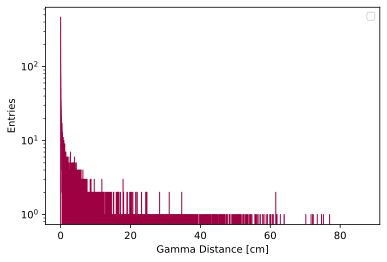

In [5]:
plt.figure()

dist_counts_v = []
dist_bins_v = []

pd.options.mode.chained_assignment = None  # Set it to "None" to disable the warning

for index, g in enumerate(gammas_v):
    deltax = g['final_x'] - g['initial_x']
    deltay = g['final_y'] - g['initial_y']
    deltaz = g['final_z'] - g['initial_z']

    # g['distances'] = np.sqrt(g['final_x']*g['final_x'] + g['final_y']*g['final_y'] + g['final_z']*g['final_z'])/1000
    g['distances'] =  np.sqrt( deltax**2 + deltay**2 + deltaz**2 )/1000
    # print(distances)

    bin_edges = np.linspace(0, g['distances'].max()*100, 50000);
    # bin_edges = np.linspace(0, 20, 10000);

    counts, bins, _ = plt.hist(g['distances']*100 , bins = bin_edges, histtype='step', color=cmap(index/len(gammas_v)))

    dist_counts_v.append(counts)
    dist_bins_v.append(bins)

plt.xlabel("Gamma Distance [cm]")
# plt.xlim(0, gammas_v[4].distances.max()) 
plt.ylabel("Entries")
plt.yscale('log')  # Set the y-axis to logarithmic scale
# plt.title(f"Pressure: {pressure_v[0]}")
plt.legend()

In [6]:
display(gammas_v[0][ (gammas_v[0]["kin_energy"] < 0.025)])

event_id  particle_id particle_name  primary  mother_id   initial_x  \
2             99           14         gamma        0          1  -12.731240   
6             99           18         gamma        0         14  -16.675760   
44            99            9         gamma        0          1   30.765688   
59            99           63         gamma        0          6   79.197861   
130          101            9         gamma        0          1  247.780563   
...          ...          ...           ...      ...        ...         ...   
458452     10091           10         gamma        0          1 -294.269409   
458463     10091            4         gamma        0          1 -147.897751   
458493     10092           27         gamma        0          7  -29.575802   
458512     10092            2         gamma        0          1   55.808189   
458814     10097            2         gamma        0          1   -4.135996   

         initial_y   initial_z  initial_t     final_x     final_y     final_z  \
2      -307.266357  862.686707   2.121908  -16.675760 -308.190308  863.445801   
6      -308.190308  863.445801   2.135657  -16.774981 -308.181946  863.519348   
44     -219.325378  722.222412   1.125753   30.638174 -219.493988  722.347961   
59     -155.704056  638.585327   0.714442   80.754913 -154.200897  639.531555   
130      61.164814  513.289673   2.113955  248.782562   60.778877  513.734497   
...            ...         ...        ...         ...         ...         ...   
458452 -134.161819  595.606995   1.968424 -294.232117 -134.218933  595.727539   
458463   -5.427382  664.993347   0.865875 -147.923553   -5.461997  665.007446   
458493  134.179535  553.018616   1.025217  -29.830122  134.604324  553.406067   
458512   13.823276  576.427917   0.235264   55.779121   13.925408  576.453125   
458814    0.688456  579.768860   0.049675   -3.916445    0.394154  579.388000   

         final_t final_volume  kin_energy    length creator_proc final_proc  \
2       2.135657       ACTIVE    0.016992  4.121797        eBrem       phot   
6       2.136070       ACTIVE    0.004097  0.123768         phot       phot   
44      1.126573       ACTIVE    0.002349  0.245894        eBrem       phot   
59      0.722321       ACTIVE    0.004097  2.362057         phot       phot   
130     2.117832       ACTIVE    0.003004  1.162234        eBrem       phot   
...          ...          ...         ...       ...          ...        ...   
458452  1.968886       ACTIVE    0.002228  0.138541        eBrem       phot   
458463  0.866026       ACTIVE    0.001628  0.045426        eBrem       phot   
458493  1.027314       ACTIVE    0.007118  0.628695        eBrem       phot   
458512  0.235628       ACTIVE    0.004207  0.109148        eBrem       phot   
458814  0.051440       ACTIVE    0.005380  0.529053        eBrem       phot   

        distances  
2        0.004122  
6        0.000124  
44       0.000246  
59       0.002362  
130      0.001162  
...           ...  
458452   0.000139  
458463   0.000045  
458493   0.000629  
458512   0.000109  
458814   0.000529  

[11196 rows x 19 columns]

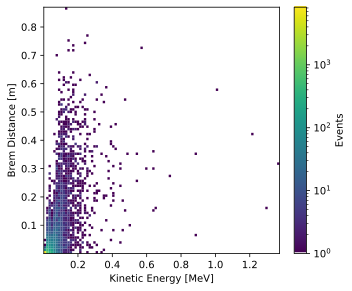

In [43]:
# Make a 2D plot of the gamma energy vs gamma distance

#Separate out the types of gammas
# other   = gammas[  gammas['creator_proc'] == "none"]
# eIoni   = gammas[  gammas['creator_proc'] == "eIoni"]
# eBrem   = gammas[  gammas['creator_proc'] == "eBrem"]
# phot    = gammas[  gammas['creator_proc'] == "phot"]
# compt   = gammas[  gammas['creator_proc'] == "compt"]
# conv    = gammas[  gammas['creator_proc'] == "conv"]
# annihil = gammas[  gammas['creator_proc'] == "annihil"]

eBrems = []

plt.figure(figsize=(18, 10))  # Adjust the figure size as needed

for index, g in enumerate(gammas_v):
    eBrems.append(g[ g['creator_proc'] == "eBrem"])

    plt.subplot(2, 3, index+1)
    plt.hist2d(eBrems[index]['kin_energy'],   eBrems[index]['distances'],  bins=(100,100), norm=LogNorm(), cmap = "viridis");

    # Create a color bar to the right of the plot
    cbar = plt.colorbar(label='Events', location='right')

    # plt.xlim(0, 0.2)
    # plt.ylim(0,5)
    plt.xlabel("Kinetic Energy [MeV]")
    plt.ylabel("Brem Distance [m]");
    # plt.title( f"E = {energy_v[index]} MeV, {pressure_v[0]}")


event_id  particle_id particle_name  primary  mother_id   initial_x  \
2             99           14         gamma        0          1  -12.731240   
18            99           11         gamma        0          1    7.450352   
44            99            9         gamma        0          1   30.765688   
55            99            6         gamma        0          1   79.458237   
130          101            9         gamma        0          1  247.780563   
...          ...          ...           ...      ...        ...         ...   
458493     10092           27         gamma        0          7  -29.575802   
458512     10092            2         gamma        0          1   55.808189   
458785     10097           12         gamma        0          1  -44.714752   
458814     10097            2         gamma        0          1   -4.135996   
458844     10098            3         gamma        0          1    8.933024   

         initial_y   initial_z  initial_t     final_x     final_y     final_z  \
2      -307.266357  862.686707   2.121908  -16.675760 -308.190308  863.445801   
18     -275.277649  752.993469   1.399117  -95.152946 -226.786346  797.973572   
44     -219.325378  722.222412   1.125753   30.638174 -219.493988  722.347961   
55     -152.844299  637.375671   0.704049   79.197861 -155.704056  638.585327   
130      61.164814  513.289673   2.113955  248.782562   60.778877  513.734497   
...            ...         ...        ...         ...         ...         ...   
458493  134.179535  553.018616   1.025217  -29.830122  134.604324  553.406067   
458512   13.823276  576.427917   0.235264   55.779121   13.925408  576.453125   
458785   52.325119  190.320358   3.241875   16.041502  -38.278568  336.965942   
458814    0.688456  579.768860   0.049675   -3.916445    0.394154  579.388000   
458844   36.806290  550.310730   0.206374   85.421791  -94.458260  379.249237   

         final_t final_volume  kin_energy      length creator_proc final_proc  \
2       2.135657       ACTIVE    0.016992    4.121797        eBrem       phot   
18      1.806312       ACTIVE    0.097203  122.073975        eBrem       phot   
44      1.126573       ACTIVE    0.002349    0.245894        eBrem       phot   
55      0.714442       ACTIVE    0.049005    3.115973        eBrem       phot   
130     2.117832       ACTIVE    0.003004    1.162234        eBrem       phot   
...          ...          ...         ...         ...          ...        ...   
458493  1.027314       ACTIVE    0.007118    0.628695        eBrem       phot   
458512  0.235628       ACTIVE    0.004207    0.109148        eBrem       phot   
458785  3.917028       ACTIVE    0.030983  202.405640        eBrem       phot   
458814  0.051440       ACTIVE    0.005380    0.529053        eBrem       phot   
458844  0.969521       ACTIVE    0.389440  228.785828        eBrem       phot   

        distances  
2        0.004122  
18       0.122074  
44       0.000246  
55       0.003116  
130      0.001162  
...           ...  
458493   0.000629  
458512   0.000109  
458785   0.182771  
458814   0.000529  
458844   0.228786  

[14674 rows x 19 columns]

173
215
217
224
259
288
292
296
350
367
369
390
410
414
442
450
455
469
470
475
486
490
516
528
553
571
593
596
667
671
683
686
694
727
744
754
784
808
811
848
854
884
893
909
934
964
1016
1019
1071
1081
1103
1117
1135
1152
1154
1173
1225
1229
1233
1241
1258
1282
1289
1305
1318
1327
1338
1345
1366
1374
1396
1407
1409
1431
1435
1439
1450
1478
1494
1500
1502
1512
1521
1527
1531
1533
1545
1549
1550
1560
1573
1574
1604
1666
1668
1680
1699
1703
1740
1754
1755
1756
1758
1777
1781
1787
1796
1801
1804
1808
1828
1837
1848
1872
1907
1931
1932
1948
1955
1976
1984
1985
2007
2024
2030
2051
2064
2078
2091
2131
2132
2162
2179
2209
2249
2260
2282
2332
2349
2370
2376
2380
2395
2407
2409
2432
2438
2440
2462
2473
2480
2485
2496
2497
2516
2548
2572
2581
2602
2646
2653
2709
2715
2758
2806
2810
2813
2838
2870
2882
2883
2903
2937
2968
2972
3000
3002
3018
3020
3027
3042
3049
3060
3074
3086
3092
3123
3136
3145
3203
3215
3230
3233
3241
3290
3292
3309
3318
3321
3322
3327
3350
3364
3365
3375
3384
3387
3388
3407
3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



9913
9934
9947
9997
10010
10014
10026
10038
10062
10075


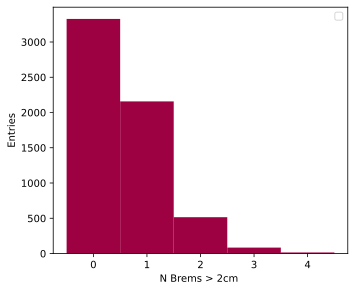

In [8]:
# Plt the bremstrahlung frequency per event

display(eBrems[0])

df = eBrems[0]

bin_edges = np.arange(-0.5, 5.5, 1)
bin_centers = np.arange(0, 5, 1)


plt.figure(figsize=(18, 10))  # Adjust the figure size as needed

for index, df in enumerate(eBrems):

    eventids = df.event_id.unique()

    n_photon_v = []

    for e in eventids:
        temp_df = df[ df["event_id"] == e]

        # Remove all gammas that have a distance of less than 2 cm
        temp_df = temp_df[temp_df.distances * 100 > 2]
        
        n_photon_v.append(len(temp_df))

        if (len(temp_df) > 1):
            print(e)

    plt.subplot(2, 3, index+1)
    plt.hist(n_photon_v, bins = bin_edges, color=cmap(index/len(eBrems)))

    plt.xlabel("N Brems > 2cm ")
    plt.ylabel("Entries")
    plt.legend()
    plt.xticks(bin_centers) 
    # plt.title( f"Pressure:  {pressure_v[0]}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


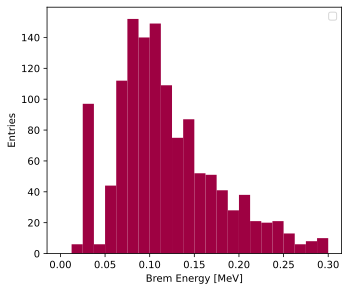

In [39]:
# Plot the gamma ray energy

plt.figure(figsize=(18, 10))  # Adjust the figure size as needed

counts_v = []
bins_v = []


for index, df in enumerate(eBrems):

    n_photon_v = []
    plt.subplot(2, 3, index+1)
    bin_edges = np.linspace(0, 0.3, 25);
    # bin_edges = np.linspace(0, 0.03, 100);
    counts, bins, _  = plt.hist(df[ df.distances * 100 > 10].kin_energy  , bins = bin_edges, color=cmap(index/len(eBrems)));
    counts_v.append(counts)
    bins_v.append(bins)

    plt.xlabel("Brem Energy [MeV]")
    plt.ylabel("Entries")
    # plt.title( f"Pressure:  {pressure_v[0]}")
    plt.legend()

0


NameError: name 'energy_v' is not defined

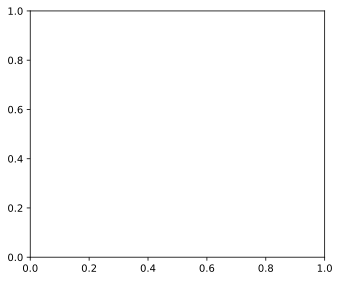

In [10]:

cum_sum = []

cumalative = 0

# Loop over the bin edges and integrate
for index, c in enumerate(counts_v):
    print(index)

    cum_sum.append(np.zeros(len(c)))
    cumalative = 0

    for j, sum_ in enumerate(c):
        cumalative+=sum_
        cum_sum[index][j]+=cumalative

    cum_sum[index]/=np.sum(c)
    cum_sum[index]*=100


plt.figure(figsize=(18, 10))  
for index, sums in enumerate(cum_sum):
    plt.subplot(2, 3, index+1)
    bin_centers = [(bins_v[index][i] + bins_v[index][i+1]) / 2 for i in range(len(bins_v[index]) - 1)]
    bin_centers = np.array(bin_centers)
    plt.plot(100*bin_centers/2.458, sums, label = f"{energy_v[index]} MeV", color=cmap(index/len(cum_sum)), linewidth = 3)
   
    plt.xlim(0, 8)
    plt.xlabel("Fraction of 0nuBB energy radiated [%]")
    plt.ylabel("Percentage of all brems")
    plt.title( f"Pressure:  {pressure_v[0]}")
    plt.legend()
    plt.grid(True)


In [ ]:
# Same again but with bremstrahlung distance

cum_sum = []

cumalative = 0

# Loop over the bin edges and integrate
for index, c in enumerate(dist_counts_v):
    print(index)

    cum_sum.append(np.zeros(len(c)))
    cumalative = 0

    for j, sum_ in enumerate(c):
        cumalative+=sum_
        cum_sum[index][j]+=cumalative

    cum_sum[index]/=np.sum(c)
    cum_sum[index]*=100


plt.figure(figsize=(18, 10))  
for index, sums in enumerate(cum_sum):
    plt.subplot(2, 3, index+1)
    bin_centers = [(dist_bins_v[index][i] + dist_bins_v[index][i+1]) / 2 for i in range(len(dist_bins_v[index]) - 1)]
    plt.plot(bin_centers, sums, label = f"{energy_v[index]} MeV", color=cmap(index/len(cum_sum)), linewidth = 3)
   

    plt.xlim(0, 3)
    plt.xlabel("Brem Distance [m]")
    plt.ylabel("Percentage of all brems")
    plt.title( f"Pressure:  {pressure_v[0]}")
    plt.legend()
    plt.grid(True)


In [ ]:
# get the hits of a specific event
category = 0

evt      = 9934
evt_hits = hits_v[category][(hits_v[category].event_id == evt)]
x = evt_hits.x/1000
y = evt_hits.y/1000
z = evt_hits.z/1000
t = evt_hits.time
e = evt_hits.energy*1000

display(gammas_v[category][gammas_v[category]["event_id"] == evt])
display(parts_v[category][(parts_v[category]["event_id"] == evt) & (parts_v[category]["primary"] == 1)])

event_id  particle_id particle_name  primary  mother_id  initial_x  \
450995      9934           16         gamma        0          1 -16.489088   
451003      9934           18         gamma        0         16  44.439754   
451029      9934            5         gamma        0          1  -9.713647   
451042      9934            4         gamma        0          1 -19.826160   
451054      9934           53         gamma        0          4 -20.880123   
451068      9934            3         gamma        0          1  -6.825219   
451076      9934           78         gamma        0          3  28.751839   

         initial_y   initial_z  initial_t    final_x     final_y     final_z  \
450995   49.601395  491.306671   2.521945  44.439754   39.650688  441.696411   
451003   39.650688  441.696411   2.786125 -18.262730  -45.431767  348.185181   
451029   89.210388  499.581909   0.462053  -0.561635   98.682632  483.376587   
451042   74.609604  515.341492   0.379872 -20.880123  123.042122  466.003937   
451054  123.042122  466.003937   0.610514 -12.923272  124.859818  462.532715   
451068   37.233555  556.564331   0.183517  28.751839  431.149872  160.535416   
451076  431.149872  160.535416   2.050507  32.382664  430.286987  161.168915   

         final_t final_volume  kin_energy      length creator_proc final_proc  \
450995  2.786125       ACTIVE    0.062225   79.199234        eBrem       phot   
451003  3.256852       ACTIVE    0.033567  141.120438         phot       phot   
451029  0.531711       ACTIVE    0.027238   20.882893        eBrem       phot   
451042  0.610514       ACTIVE    0.081179   69.144867        eBrem       phot   
451054  0.640099       ACTIVE    0.029781    8.869325         phot       phot   
451068  2.050507       ACTIVE    0.174368  559.709473        eBrem       phot   
451076  2.063133       ACTIVE    0.004413    3.785336         phot       phot   

        distances  
450995   0.079199  
451003   0.141120  
451029   0.020883  
451042   0.069145  
451054   0.008869  
451068   0.559709  
451076   0.003785

event_id  particle_id particle_name  primary  mother_id  initial_x  \
450994      9934            1            e-        1          0        0.0   

        initial_y   initial_z  initial_t    final_x    final_y     final_z  \
450994        0.0  593.700012        0.0 -16.396061  49.554043  491.287537   

         final_t final_volume  kin_energy      length creator_proc final_proc  
450994  2.526257       ACTIVE         2.6  692.155945         none      eIoni

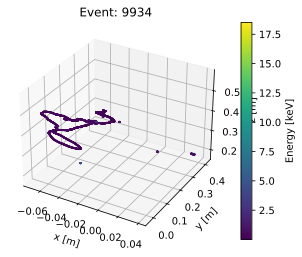

In [ ]:
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

x_range = (x.max()-x.min()) * 0.5
y_range = (y.max()-y.min()) * 0.5
z_range = (z.max()-z.min()) * 0.5
mid_x = (x.max()+x.min()) * 0.5
mid_y = (y.max()+y.min()) * 0.5
mid_z = (z.max()+z.min()) * 0.5
ax.set_xlim(mid_x - x_range, mid_x + x_range)
ax.set_ylim(mid_y - y_range, mid_y + y_range)
ax.set_zlim(mid_z - z_range, mid_z + z_range)

# ax.set_xlim(-0.2, 0.2)
# ax.set_ylim(-0.2, 0.2)
# ax.set_zlim(-0.2, 0.2)

fig = plt.gcf()  # Get the current figure
fig.patch.set_facecolor('white')  # Set the background color to white

p = ax.scatter(x,y,z,cmap='viridis',c=e, s=1, zorder=2) #coolwarm
# ax.scatter(0,0,0,c="red", s=5, zorder=1) #coolwarm
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy [keV]')
ax.set_title(f"Event: {evt}")
# plt.savefig(f"../plots/events/event_{evt}_P{pressure_v[0]}_E_{energy_v[category]}.png", dpi = 800, transparent=False)

plt.show()

In [ ]:
r0 = np.array([0.011529, 0.093824])
r1 = np.array([0.022936, 0.170519])
r2 = np.array([0.0067319, 0.249209])

v1 = np.subtract(r1, r0)
v2 = np.subtract(r2, r1)
print(v1, v2)

v1_mag = np.sqrt(v1[0]**2 + v1[1]**2)
v2_mag = np.sqrt(v2[0]**2 + v2[1]**2)
print(v1_mag, v2_mag)

costheta =  (v1[0]*v2[0] + v1[1]*v2[1]) / ( v1_mag * v2_mag )
print(costheta)
print(np.arccos(costheta) * 180/np.pi)


In [ ]:
# Estimate the ranges for a gamma in 1 bar xenon

# Sigma [MBarnes], Percentage of events contained
def gamma_range(sigma, prob):
    return 0.01*1/(26.87*sigma)*np.log(1/(1 - 0.01*prob))

# Sigma [MBarnes], Percentage of events contained
def gamma_containment(sigma, distance):
    return 100* (1 - np.exp(-26.87*sigma*distance))


Gamma_energies = [10, 100, 200, 300, 400, 1000]
absorb_cross = [2e-2, 4e-4, 1e-4, 4e-5, 3e-5, 0.5e-5]

print(gamma_range(4e-4, 90))

plt.figure(figsize=(9,6))
plt.plot(Gamma_energies, gamma_range(np.array(absorb_cross), np.full(len(absorb_cross), 90)), linewidth = 3, color = cmap(0));
plt.xlabel("Brem Energy [keV]",fontsize=20)
plt.ylabel("Brem distance 90% containment [m]",fontsize=20);
plt.yticks(fontsize=20);  # Set the y tick label size to 12
plt.xticks(fontsize=20);  # Set the x tick label size to 12


plt.figure(figsize=(9,6))
plt.plot(Gamma_energies, gamma_containment(np.array(absorb_cross), np.full(len(absorb_cross), 250)  ), linewidth = 3, color = cmap(0));
plt.xlabel("Brem Energy [keV]",fontsize=20)
plt.ylabel("Percentage of events contained in 2.5 m [%]",fontsize=20);
plt.yticks(fontsize=20);  # Set the y tick label size to 12
plt.xticks(fontsize=20);  # Set the x tick label size to 12


In [ ]:
# Get the mean energies for each event without including the bremstrahlung energy

parts_nobrem = []

for index, df in enumerate(parts_v):
    parts_nobrem.append(df[ df['particle_name'] != "gamma"])

In [ ]:
display(parts_v[0][ (parts_v[0]["particle_name"] == "gamma") &  (parts_v[0]["event_id"] == 1) ] )
display(parts_v[0][ (parts_v[0]["mother_id"] == 84) | (parts_v[0]["mother_id"] == 85) ] )



In [ ]:
# event = parts_nobrem[0][parts_nobrem[0]["event_id"] == 1]
event = hits_v[0][hits_v[0]["event_id"] == 1]
pd.set_option('display.max_rows', None)
display(event[ event.particle_id == 82  ])


energy = event.energy.sum()
print(energy)

In [ ]:
# For loop and get all the daughters from a gamma
category = 4

event_parts = parts_v[category][parts_v[category]["event_id"] == 16]
event_hits  = hits_v[category][hits_v[category]["event_id"] == 16]

event_list = parts_v[category].event_id.unique()
print(event_list)
event_energies = []

for index, e in enumerate(event_list):
    print(index)

    if (index > 1000): 
        break

    event_parts = parts_v[category][parts_v[category]["event_id"] == e]
    event_hits =  hits_v[category][hits_v[category]["event_id"] == e]

    # First get the gamma index
    gamma_ids = event_parts[event_parts["particle_name"] == "gamma" ].particle_id.values
    daughters = event_parts[event_parts["mother_id"].isin(gamma_ids)].particle_id.values
    # print(gamma_ids)
    # print(daughters)
    all_ids = []

    temp_daughters = daughters

    while (True):
        sub_daughters = event_parts[event_parts["mother_id"].isin(temp_daughters)].particle_id.values
        # print(sub_daughters)

        if (len(sub_daughters) ==  0):
            all_ids = np.concatenate((gamma_ids, daughters))
            event_hits = event_hits[~event_hits["particle_id"].isin(all_ids)]
            event_energy = event_hits.energy.sum()
            print(event_energy)
            event_energies.append(event_energy)
            break

        else:
            daughters = np.concatenate((daughters, sub_daughters))
            daughters = np.unique(daughters)
            temp_daughters = sub_daughters
            print("Looping through", index)
            sub_daughters = []


# print("done")

# print(sub_daughters)
# print(all_ids)
print("Mean Event Energy: ", event_energy.mean())

[   0    1    2 ... 4997 4998 4999]
0
Looping through 0
Looping through 0
Looping through 0
1.8818127
1
Looping through 1
2.4382534
2
2.4901624
3
Looping through 3
Looping through 3
2.4710307
4
2.490336
5
Looping through 5
Looping through 5
2.3187904
6
Looping through 6
Looping through 6
2.3726616
7
Looping through 7
Looping through 7
2.1042345
8
Looping through 8
Looping through 8
2.1225522
9
Looping through 9
Looping through 9
Looping through 9
Looping through 9
Looping through 9
1.8511531
10
Looping through 10
Looping through 10
2.2046156
11
Looping through 11
Looping through 11
2.429616
12
2.49867
13
Looping through 13
Looping through 13
Looping through 13
Looping through 13
1.6686562
14
2.4740207
15
Looping through 15
Looping through 15
2.422289
16
2.4840662
17
Looping through 17
2.4959028
18
Looping through 18
2.4838135
19
2.486095
20
Looping through 20
Looping through 20
Looping through 20
2.4226644
21
Looping through 21
Looping through 21
Looping through 21
Looping through 21
1

Text(0, 0.5, 'True Energy - Brem Energy [MeV]')

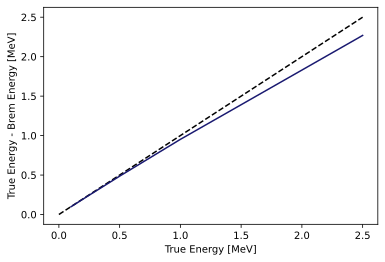

: 

In [ ]:
# Calculate the energy radiated away from bremsstrahlung radiation
energy_no_brem = []
energy_no_brem.append( (0.1 * 5000 - gammas_v[0].kin_energy.sum()) / 5000)
energy_no_brem.append( (0.25 * 5000 - gammas_v[1].kin_energy.sum()) / 5000)
energy_no_brem.append( (0.5 * 5000 - gammas_v[2].kin_energy.sum()) / 5000)
energy_no_brem.append( (1 * 5000 - gammas_v[3].kin_energy.sum()) / 5000)
energy_no_brem.append( (2.5 * 5000 - gammas_v[4].kin_energy.sum()) / 5000)

energies =  [0.1, 0.25, 0.5, 1, 2.5]

# Create an array of x values
x = np.linspace(0, 2.5, 100)  # Create 100 points between -5 and 5
y = x

plt.figure()
plt.plot(x, y, '--', color = 'black')
plt.plot(energies ,energy_no_brem, color = "midnightblue")
plt.xlabel("True Energy [MeV]")
plt.ylabel("True Energy - Brem Energy [MeV]")

